In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the Csv file and print info about the dataFrame
df = pd.read_csv("/content/drive/MyDrive/railway.csv")
print("Initial Shape(rows, columns):", df.shape)
print(df.info())

Initial Shape(rows, columns): (31653, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Sta

In [6]:
print(df.head())

            Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176        12/8/2023         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       12/16/2023         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       12/19/2023         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       12/20/2023         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       12/27/2023         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card      NaN     Standard     Advance      3   
3    Credit Card      NaN     Standard     Advance     13   
4    Contactless      NaN     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street        1/1/2024   
1     London Kings Cross      

In [7]:
# counting the null values in the columns

print(df.isnull().sum())

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64




# * Generating a visual shows the columns with null values


<ipython-input-8-6de558f57481>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="rocket")


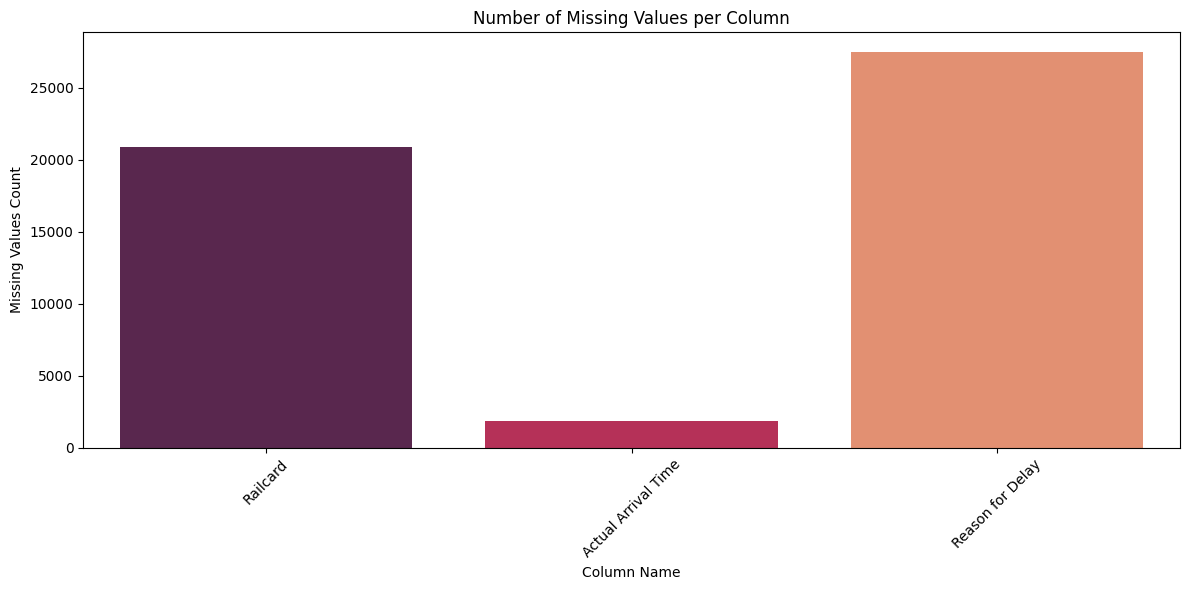

In [8]:
missing_counts = df.isnull().sum()

# Filter only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="rocket")
plt.title("Number of Missing Values per Column")
plt.ylabel("Missing Values Count")
plt.xlabel("Column Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* the visual shows that the most columns with null values is the RailCard and Reason for Delay columns

_________________________________________________________________________________________________________

# *the railCard and  Reason for Delay columns nulls exceeds more than 2/3 of the dataSet volume so we can't remove this values*

-------------------------------------------------------------------------------------------------------------




# *Create a heatmap to visualize missing values in the DataFrame*



# *It shows more clarification of the nu of nulls and the rows with null values*




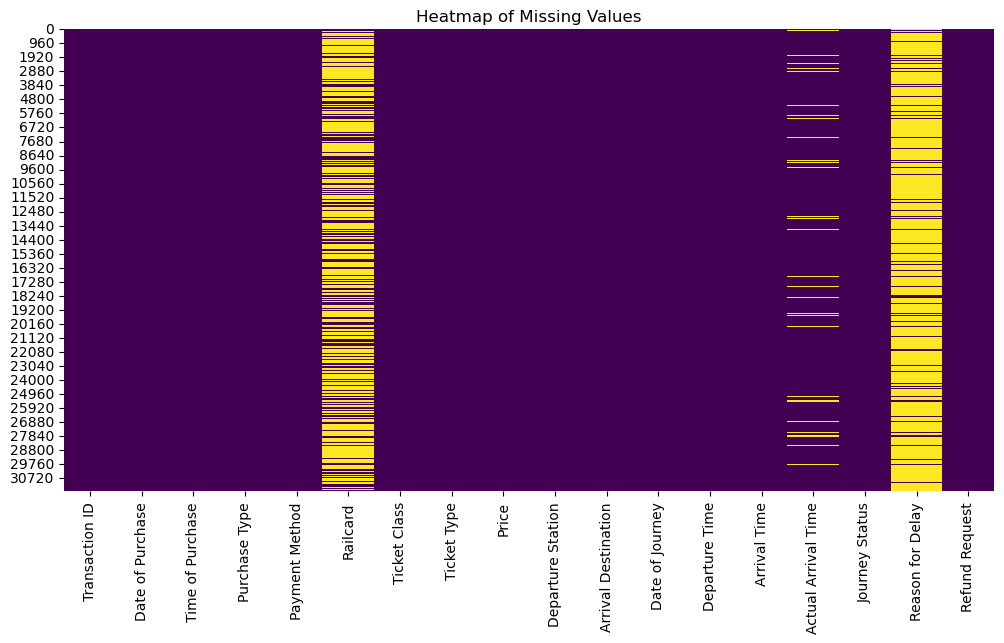

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [ ]:
# # Make a backup before making any big changes
# df_backup = df.copy()

--------------------------------------------------------

# *As we noticed the rows with many null values in the RailCard and ReasonForDelay we can't remove this as it will drop most of our dataSet so we assigned it as Unkowns as the columns are String values*

In [9]:
# # Handling the 2 columns with many null values
# categorical_cols = ["Railcard", "Reason for Delay"]
# for col in categorical_cols:
#     if col in df.columns:
#         df[col] = df[col].fillna("Unknown")

df['Railcard'] = df['Railcard'].fillna('No Card')
df['Railcard'] = df['Railcard'].replace('None', 'No Card')

# تعديل القيم في عمود Reason for Delay
df['Reason for Delay'] = df['Reason for Delay'].fillna('No Delay')

In [10]:
print(df.isnull().sum())

Transaction ID            0
Date of Purchase          0
Time of Purchase          0
Purchase Type             0
Payment Method            0
Railcard                  0
Ticket Class              0
Ticket Type               0
Price                     0
Departure Station         0
Arrival Destination       0
Date of Journey           0
Departure Time            0
Arrival Time              0
Actual Arrival Time    1880
Journey Status            0
Reason for Delay          0
Refund Request            0
dtype: int64


---------------

After handling the two null values columns we have the Actual Arrival Time with  1880 row of null values

**After making a good look at the dataSet I Found that the most of the Actual Arrival time is the same as the ArrivalTime so i assigned them to the null values in the ActualArrivalTime instead of drop the nulls of Actual Arrival Time as it is = 1880 rows and it will affect the analysis after tha**t

In [11]:
# filling null values in Actual Arrival time with Arrival time
df["Actual Arrival Time"].fillna(df["Arrival Time"], inplace=True)

<ipython-input-11-f53072618876>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Actual Arrival Time"].fillna(df["Arrival Time"], inplace=True)


In [12]:
print(df.isnull().sum())

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64


# *Now we Handled All the missings and nulls in dataSet without dropping any records*

----

In [13]:
# Counting the duplicated rows and there is no duplication
df.duplicated().sum()

np.int64(0)

# *Searching for Duplication in rows*

In [14]:
df[df.duplicated(keep=False)]

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request


----

In [15]:
# Format Dates and Times and Standarize text
date_cols = ["Date of Purchase", "Date of Journey"]
time_cols = ["Time of Purchase", "Departure Time", "Arrival Time", "Actual Arrival Time"]
text_cols = ["Purchase Type", "Payment Method", "Ticket Class", "Ticket Type",
             "Departure Station", "Arrival Destination", "Journey Status", "Refund Request"]
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format="%H:%M:%S", errors="coerce").dt.time

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.title()

# *Formatting all the time and date and text columns in our DataSet*

---------------------------------------------

# Handling the outliers in the price Column
#*Scatter Plot shows us the outliers in price*

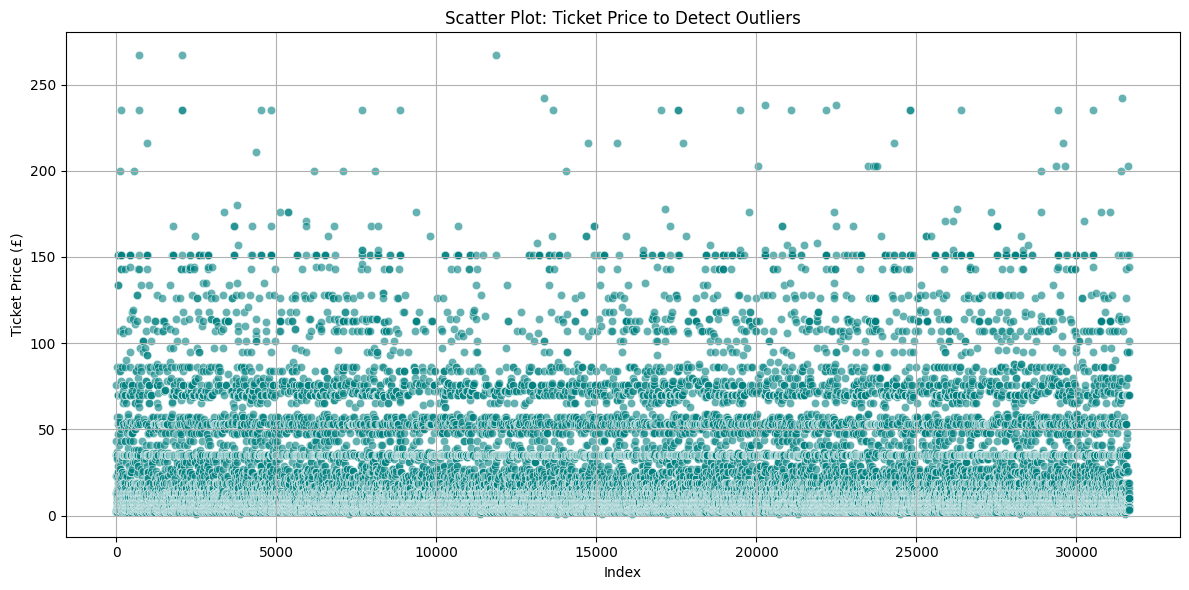

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df["Price"], alpha=0.6, color='teal')

plt.title("Scatter Plot: Ticket Price to Detect Outliers")
plt.xlabel("Index")
plt.ylabel("Ticket Price (£)")
plt.grid(True)
plt.tight_layout()
plt.show()


-------------------

# *prevents removal of rows while handling outliers gracefully.*

In [17]:
if "Price" in df.columns:
    lower = 0
    upper = 150

    df["Price"] = np.where(df["Price"] < lower, lower, df["Price"])
    df["Price"] = np.where(df["Price"] > upper, upper, df["Price"])


------------------------

# *ScatterPlot After Handling the price Outliers*

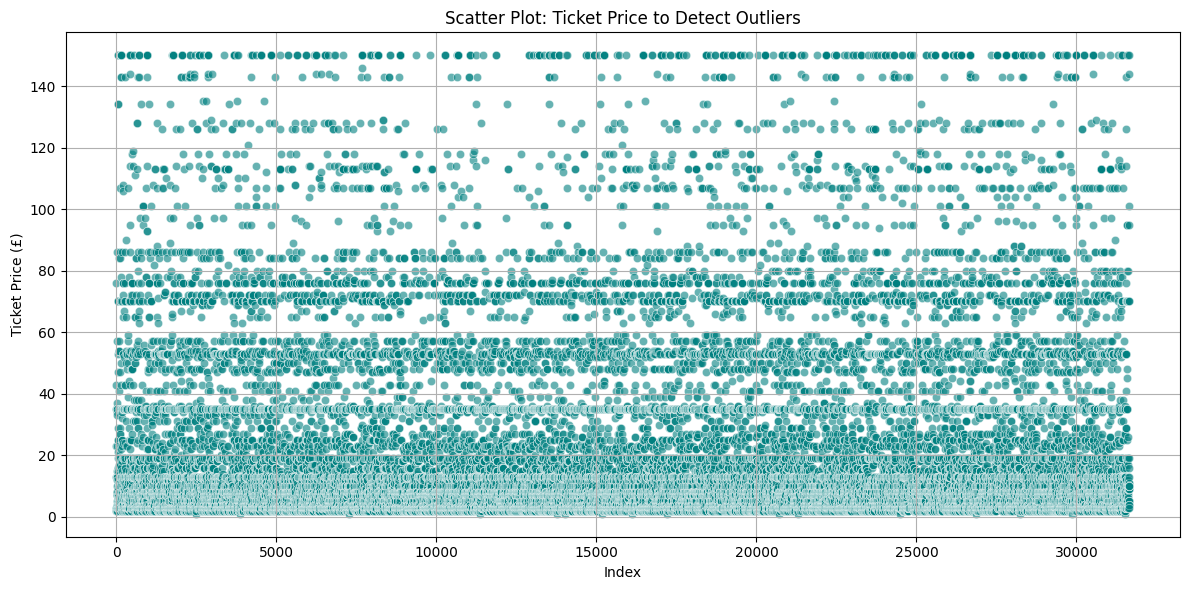

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.index, y=df["Price"], alpha=0.6, color='teal')

plt.title("Scatter Plot: Ticket Price to Detect Outliers")
plt.xlabel("Index")
plt.ylabel("Ticket Price (£)")
plt.grid(True)
plt.tight_layout()
plt.show()



# *Histogram visualization shows us*
    -How ticket prices are distributed.
    -Whether the prices are skewed, normally distributed, or contain outliers.
    -The most common price ranges.

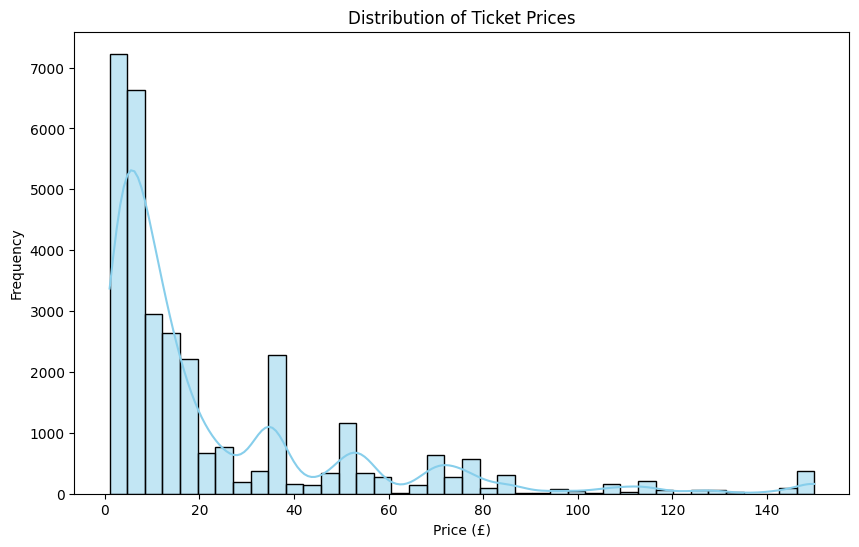

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Ticket Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()

# *horizontal bar chart to visualize the top 10 routes.*

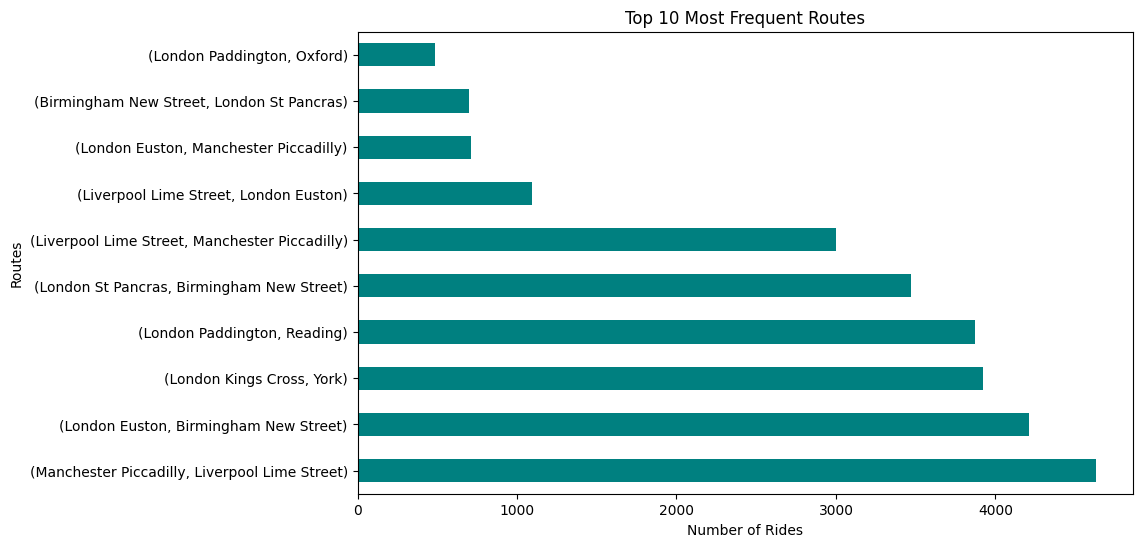

In [20]:
top_routes = df.groupby(["Departure Station", "Arrival Destination"]).size().sort_values(ascending=False).head(10)
top_routes.plot(kind="barh", figsize=(10, 6), color="teal")
plt.title("Top 10 Most Frequent Routes")
plt.xlabel("Number of Rides")
plt.ylabel("Routes")
plt.show()


------------------------------

In [21]:
df.to_csv("cleaned_railway.csv", index=False)
